# Lab 7 - Model comparison

F - number of letters in first name L - number of letters in last name N = (L+F)*100

In [1]:
F = len("JINHUNG")
L = len("TOH")
N = (L+F)*100

### Excercise 1 - generate data
1. Compile code_1.stan and code_2.stan
2. Generate data for rest of excercises.

In [2]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import statistics as s 

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
code1 = CmdStanModel(stan_file='code_1.stan')
data1 = code1.sample(data={'N': N}, chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [4]:
code2 = CmdStanModel(stan_file='code_2.stan')
data2 = code2.sample(data={'N': N}, chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


### Excercise 2 - compare normal and student models for data from first file
1. Compile both models
2. Fit both models
3. Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

In [5]:
model3 = CmdStanModel(stan_file='code_3.stan')
model4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [6]:
y_data1_median = np.percentile(data1.stan_variable('y')[:,:], 50, axis=0)
y_data2_median = np.percentile(data2.stan_variable('y')[:,:], 50, axis=0)

In [7]:
#Model3 with data1
model3_fit_data1 = model3.sample(data={'N': N, 'y':y_data1_median}, chains = 4)

#Convertion to arviz InferenceData
arviz_model3_fit_data1 = az.from_cmdstanpy(
    posterior=model3_fit_data1,
    posterior_predictive=["log_lik","y_hat"],
    log_likelihood="log_lik",
    observed_data={"y": y_data1_median},
)

#Model4 with data1
model4_fit_data1 = model4.sample(data={'N': N, 'y':y_data1_median}, chains = 4)
                            
#Convertion to arviz InferenceData
arviz_model4_fit_data1 = az.from_cmdstanpy(
    posterior=model4_fit_data1,
    posterior_predictive=["log_lik","y_hat"],
    log_likelihood="log_lik",
    observed_data={"y": y_data1_median},
)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn

<AxesSubplot:xlabel='Log'>

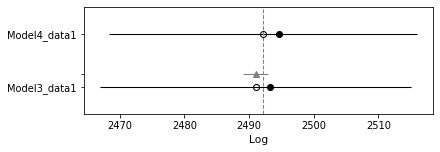

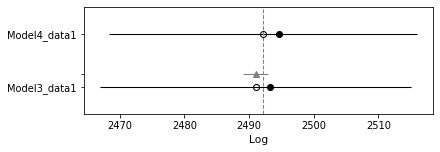

In [8]:
dict1 = {'Model3_data1': arviz_model3_fit_data1,'Model4_data1': arviz_model4_fit_data1}
comparison_waic_1 = az.compare(dict1, ic = 'waic')
az.plot_compare(comparison_waic_1)
comparison_loo_1 = az.compare(dict1, ic = 'loo')
az.plot_compare(comparison_loo_1)

In [9]:
#Model3 with data2
model3_fit_data2 = model3.sample(data={'N': N, 'y':y_data2_median}, chains = 4)

#Convertion to arviz InferenceData
arviz_model3_fit_data2 = az.from_cmdstanpy(
    posterior=model3_fit_data2,
    posterior_predictive=["log_lik","y_hat"],
    log_likelihood="log_lik",
    observed_data={"y": y_data2_median},
)

#Model4 with data2
model4_fit_data2 = model4.sample(data={'N': N, 'y':y_data2_median}, chains = 4)
                            
#Convertion to arviz InferenceData
arviz_model4_fit_data2 = az.from_cmdstanpy(
    posterior=model4_fit_data2,
    posterior_predictive=["log_lik","y_hat"],
    log_likelihood="log_lik",
    observed_data={"y": y_data2_median},
)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn

<AxesSubplot:xlabel='Log'>

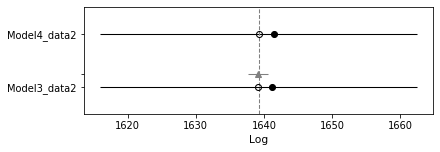

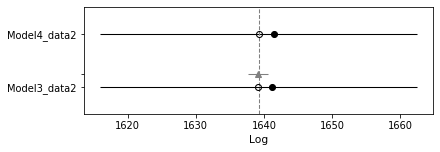

In [10]:
dict2 = {'Model3_data2': arviz_model3_fit_data2,'Model4_data2': arviz_model4_fit_data2}
comparison_waic_2 = az.compare(dict2, ic = 'waic')
az.plot_compare(comparison_waic_2)
comparison_loo_2 = az.compare(dict2, ic = 'loo')
az.plot_compare(comparison_loo_2)

### Excercise 3 - compare models with different numbers of predictors
1. Compile model
2. Compare models for 1, 2 and 3 predictors as in previous excercise

In [11]:
model5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [12]:
x2_median_1_3=np.percentile(data2.stan_variable('X')[:,:],50,axis=0)
x2_median_K1=x2_median_1_3[:,0:1]
x2_median_K2=x2_median_1_3[:,0:2]
x2_median_K3=x2_median_1_3[:,0:3]

In [22]:
data5_K1 = dict(
    N = N,
    K = 1,
    y = y_data2_median,
    X = x2_median_K1
)

model5_K1 = model5.sample(data = data5_K1, chains = 4)

arviz_model5_K1 = az.from_cmdstanpy(
    posterior=model5_K1,
    posterior_predictive=["log_lik","y_hat"],
    log_likelihood="log_lik",
    observed_data={"y": y_data2_median},
)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [24]:
data5_K2 = dict(
    N = N,
    K = 2,
    y = y_data2_median,
    X = x2_median_K2
)

model5_K2 = model5.sample(data = data5_K2, chains = 4)

arviz_model5_K2 = az.from_cmdstanpy(
    posterior=model5_K2,
    posterior_predictive=["log_lik","y_hat"],
    log_likelihood="log_lik",
    observed_data={"y": y_data2_median},
)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [25]:
data5_K3 = dict(
    N = N,
    K = 3,
    y = y_data2_median,
    X = x2_median_K3
)

model5_K3 = model5.sample(data = data5_K3, chains = 4)

arviz_model5_K3 = az.from_cmdstanpy(
    posterior=model5_K3,
    posterior_predictive=["log_lik","y_hat"],
    log_likelihood="log_lik",
    observed_data={"y": y_data2_median},
)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

<AxesSubplot:xlabel='Log'>

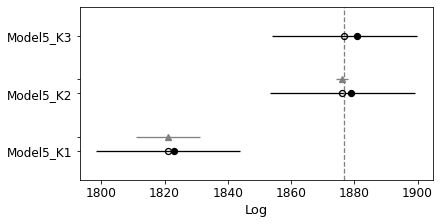

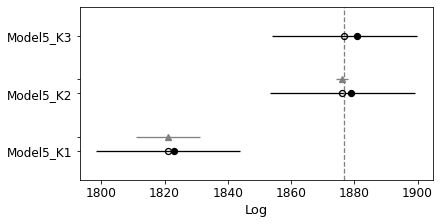

In [26]:
dict3 = {'Model5_K1': arviz_model5_K1,'Model5_K2': arviz_model5_K2,'Model5_K3': arviz_model5_K3}
comparison_waic_3 = az.compare(dict3, ic = 'waic')
az.plot_compare(comparison_waic_3)
comparison_loo_3 = az.compare(dict3, ic = 'loo')
az.plot_compare(comparison_waic_3)